In [10]:
from array import array
import math
import numpy as np
import random
import time

In [14]:
def seedLCG(initVal):
    global rand
    rand = initVal
    
def rand_ejb():
    a = 16807
    m = 2147483647
    b = 0
    global rand
    
    rand = (a*rand + b) % m
    return rand/m

elapsed time = 16.038
elapsed time = 5.549
Total number of randoms generated = 9578536
Uncertainty in the mean = 0.001000


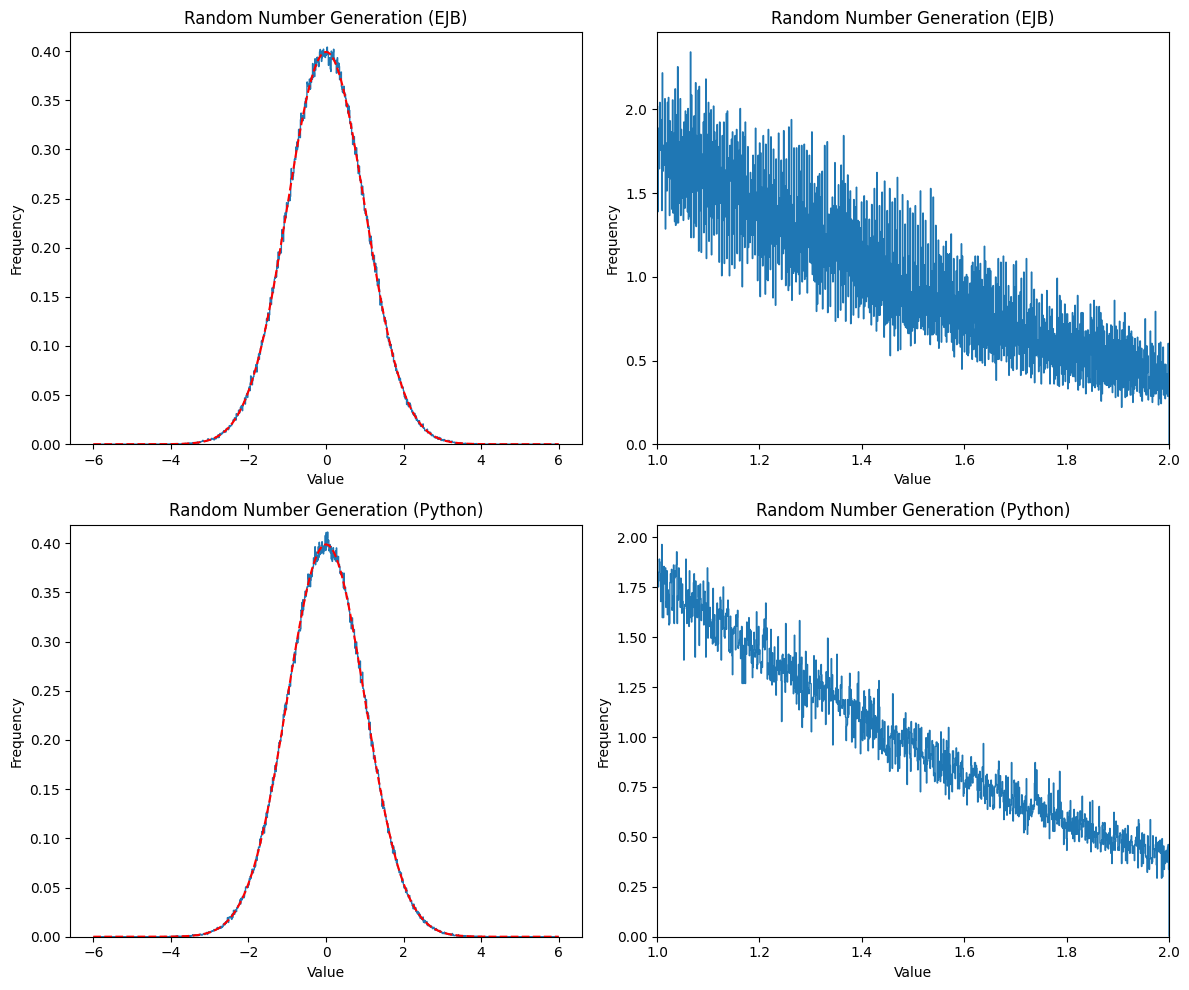

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

# Set the seed for random number generation
iseed = 1
random.seed(iseed)
seedLCG(iseed)

# Define the number of points, centroid, sigma, seed, number of bins, width, and dx
npoints = 1000000
centroid = 0
sigma = 1

nbins = 1000
width = 12.0 * sigma
dx = width / nbins
n_randoms = 0

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Generate random numbers using the EJB algorithm and fill the histograms
ticks1 = time.time()
ejb_data = []
for i in range(npoints):
    check = True
    while check:
        r1 = rand_ejb()
        n_randoms += 1
        x = centroid - width / 2.0 + width * r1
        pgauss = np.exp(-1.0 * (x - centroid) * (x - centroid) / (2.0 * sigma * sigma))
        r2 = rand_ejb()
        n_randoms += 1
        if r2 < pgauss:
            check = False
            ejb_data.append(x)

h1, bins1, _ = axs[0, 0].hist(ejb_data, bins=nbins, range=(centroid - width / 2.0, centroid + width / 2.0),
                              histtype='step', density=True)
h2, bins2, _ = axs[0, 1].hist(ejb_data, bins=nbins, range=(centroid + width / 12.0, centroid + width / 12.0 + width / 12.0),
                              histtype='step', density=True)
ticks2 = time.time()
print("elapsed time = %.3f" % (ticks2 - ticks1))

# Generate random numbers using the Python random module and fill the histograms
ticks3 = time.time()
python_data = [random.gauss(centroid, sigma) for _ in range(npoints)]
h3, bins3, _ = axs[1, 0].hist(python_data, bins=nbins, range=(centroid - width / 2.0, centroid + width / 2.0),
                              histtype='step', density=True)
h4, bins4, _ = axs[1, 1].hist(python_data, bins=nbins, range=(centroid + width / 12.0, centroid + width / 12.0 + width / 12.0),
                              histtype='step', density=True)
ticks4 = time.time()
print("elapsed time = %.3f" % (ticks4 - ticks3))

print("Total number of randoms generated = %d" % n_randoms)
print("Uncertainty in the mean = %f" % (sigma / np.sqrt(npoints)))

# Fit the histogram data with a Gaussian function
from scipy.stats import norm

fit_params1 = norm.fit(ejb_data)
fit_params3 = norm.fit(python_data)

# Plot the fitted Gaussian functions
x = np.linspace(centroid - width / 2.0, centroid + width / 2.0, nbins)
y1 = norm.pdf(x, *fit_params1)
y3 = norm.pdf(x, *fit_params3)

axs[0, 0].plot(x, y1, 'r--', label='Fit')
axs[1, 0].plot(x, y3, 'r--', label='Fit')

# Set titles for subplots
axs[0, 0].set_title('Random Number Generation (EJB)')
axs[0, 1].set_title('Random Number Generation (EJB)')
axs[1, 0].set_title('Random Number Generation (Python)')
axs[1, 1].set_title('Random Number Generation (Python)')

# Set labels for subplots
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')

axs[0, 1].set_xlim(centroid+width/12.0,centroid+width/12.0+width/12.0)
axs[1, 1].set_xlim(centroid+width/12.0,centroid+width/12.0+width/12.0)

# Show the plots
plt.tight_layout()
plt.show()
